In [1]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
import time
import sys
import os
import argparse
from numpy.random import normal, uniform
from numpy.linalg import norm
import itertools
import pandas as pd
from matplotlib import pyplot as plt
import math
from sklearn.datasets import load_svmlight_file
import datetime
from IPython import display
from tqdm import tqdm
#import IPython

from contextlib import redirect_stdout
import shutil
import subprocess
from tournament import * 
from numpy.random import RandomState
import matplotlib.ticker as tck
myrepr = lambda x: repr(round(x, 4)).replace('.',',') if isinstance(x, float) else repr(x) #for some methods we used diffrent rounding
intrepr = lambda x: int(x) if x.is_integer() else round(x,4) 

# Experiments on known prior

## Tournament method

### normal

In [ ]:
mean = 0
sigma_ar = [1,10,100]

d_ar = np.array([10**2, 10**3, 10**5, 10**7, 10**9], dtype=int)
n_samples = 10_000
    

In [10]:
project_path = os.getcwd() + "/"

mean = 0
sigma = 1

d_ar = np.array([10**2, 10**3, 10**5, 10**7, 10**9], dtype=int)

#test
d_ar = np.array([10**2, 10**3], dtype=int)
n_samples = 10
mean = 0
sigma = 1
num_plot_points = 100        

algorithm_name = "tournament"
distribution_family = "normal"
experiment_type = "synthetic"

rs = RandomState(12345)
tournament = TournamentTopK()

if distribution_family=="normal":
    distribution = distribution_family+f"_m-{myrepr(mean)}_s-{myrepr(sigma)}"
    experiment = '{0}_{1}'.format(experiment_type, algorithm_name, distribution)
    logs_path = project_path + "logs/logs_{0}/".format(experiment)

    #a global folder to store time complexity results
    if not os.path.exists(project_path + "logs/"):
        os.makedirs(project_path + "logs/")

    #a folder to store time complexity results of the experiments groupped by experiment_type, algorithm_name and distribution
    if not os.path.exists(logs_path):
        os.makedirs(logs_path)

    for d in d_ar:
        print(f"d = {d}")
        k_ar = np.linspace (max(int(0.01*d),1), d, num_plot_points, dtype=int)
        tc_hist = np.zeros((k_ar.shape[0],n_samples))
        tc_median = np.zeros(k_ar.shape[0])

        for i_k in range(k_ar.shape[0]):
            print(f"k = {k_ar[i_k]}")
            for i_s in tqdm(range(n_samples)):
                sample_vector =  rs.normal(loc=mean, scale=sigma, size=d)
                topk_knuth, numberOfComparisons = tournament.getMaximumKSortedElements(list(sample_vector), k_ar[i_k])
                tc_hist [i_k,i_s] = numberOfComparisons
            display.clear_output(wait=True)
        tc_median = np.median (tc_hist, axis=1)
        tc_k_name = 'TCK_prior-{0}_n-{1}_d-{2}.npy'.format(distribution, n_samples, d)
        tc_hist_name = 'TCH_prior-{0}_n-{1}_d-{2}.npy'.format(distribution, n_samples, d)
        tc_median_name = 'TCM_prior-{0}_n-{1}_d-{2}.npy'.format(distribution, n_samples, d)
            
            #code saving procedure
            
        np.save(logs_path + tc_k_name, k_ar)
        np.save(logs_path + tc_hist_name, tc_hist)
        np.save(logs_path + tc_median_name, tc_median)


  0%|          | 0/10 [00:00<?, ?it/s]

k = 1000


100%|██████████| 10/10 [00:02<00:00,  4.21it/s]


# Drawing section 

In [5]:
from numba import jit, njit, prange

In [10]:
def draw_axis_and_safe(fig_ax_ar, d_ar, k_ar_frac, plot_path, filename, x_label, y_label, plots_titles):
    size = 40
    marker_size = 30
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'FreeSerif'
    plt.rcParams['lines.linewidth'] = 4
    # plt.rcParams['lines.markersize'] = 10
    plt.rcParams['xtick.labelsize'] = size  # 40
    plt.rcParams['ytick.labelsize'] = size  # 40
    plt.rcParams['legend.fontsize'] = 30  # 30
    plt.rcParams['axes.titlesize'] = size  # 40
    plt.rcParams['axes.labelsize'] = size  # 40
    #if len(dataset_ar)==4:
    plt.rcParams["figure.figsize"] = [64,100]
    #if len(dataset_ar)==1:
    #plt.rcParams["figure.figsize"] = [15,10]
    #plt.rcParams["figure.figsize"] = [70,10]
    
    (fig, axs) = fig_ax_ar
    limits = (0, 1)
            
    for i,k in enumerate(k_ar_frac):
        for j,d in enumerate(d_ar):
            axs[i,j].set_title(f"{plots_titles[j]}")#; $n$ = {n_ar[0]}")
            axs[i,j].set(xlabel=x_label, ylabel=y_label)
            #axs[dataset_num].set_ylabel('#bits/n', fontsize = 40.0) # Y label
            #axs[dataset_num].set_xlabel(r"$\|| \nabla f(x^t) \||^2$", fontsize = 40) # X label

            #axs[dataset_num].set_yscale('log')
            #legend = axs[dataset_num].legend(loc="lower left", framealpha=0.5)
            #legend = axs[dataset_num].legend(loc="upper right", framealpha=0.5)
            #legend = axs[i,j].legend(loc=legend_location[dataset_num], framealpha=0.5)
            legend = axs[i,j].legend(loc="best", framealpha=0.5)

            #if dataset_ar[dataset_num] == "a9a":
            #    legend = axs[dataset_num].legend(loc="lower left", framealpha=0.5)
            axs[i,j].grid()
            #axs[i,j].locator_params(axis='x', nbins=4)
            #axs[i,j].xaxis.set_minor_locator(tck.AutoMinorLocator(5))

            #locmin = tck.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=10)
            #axs[dataset_num].yaxis.set_minor_locator(locmin)
            #axs[dataset_num].yaxis.set_minor_formatter(tck.NullFormatter())
            #axs[i,j].set_ylim(limits)
            #print(axs[dataset_num].get_ylim())
    where = plot_path + "_0_" + filename
    fig.savefig(plot_path + "_0_" + filename, bbox_inches='tight')
    plt.show()
    print(f"saving is finished!")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


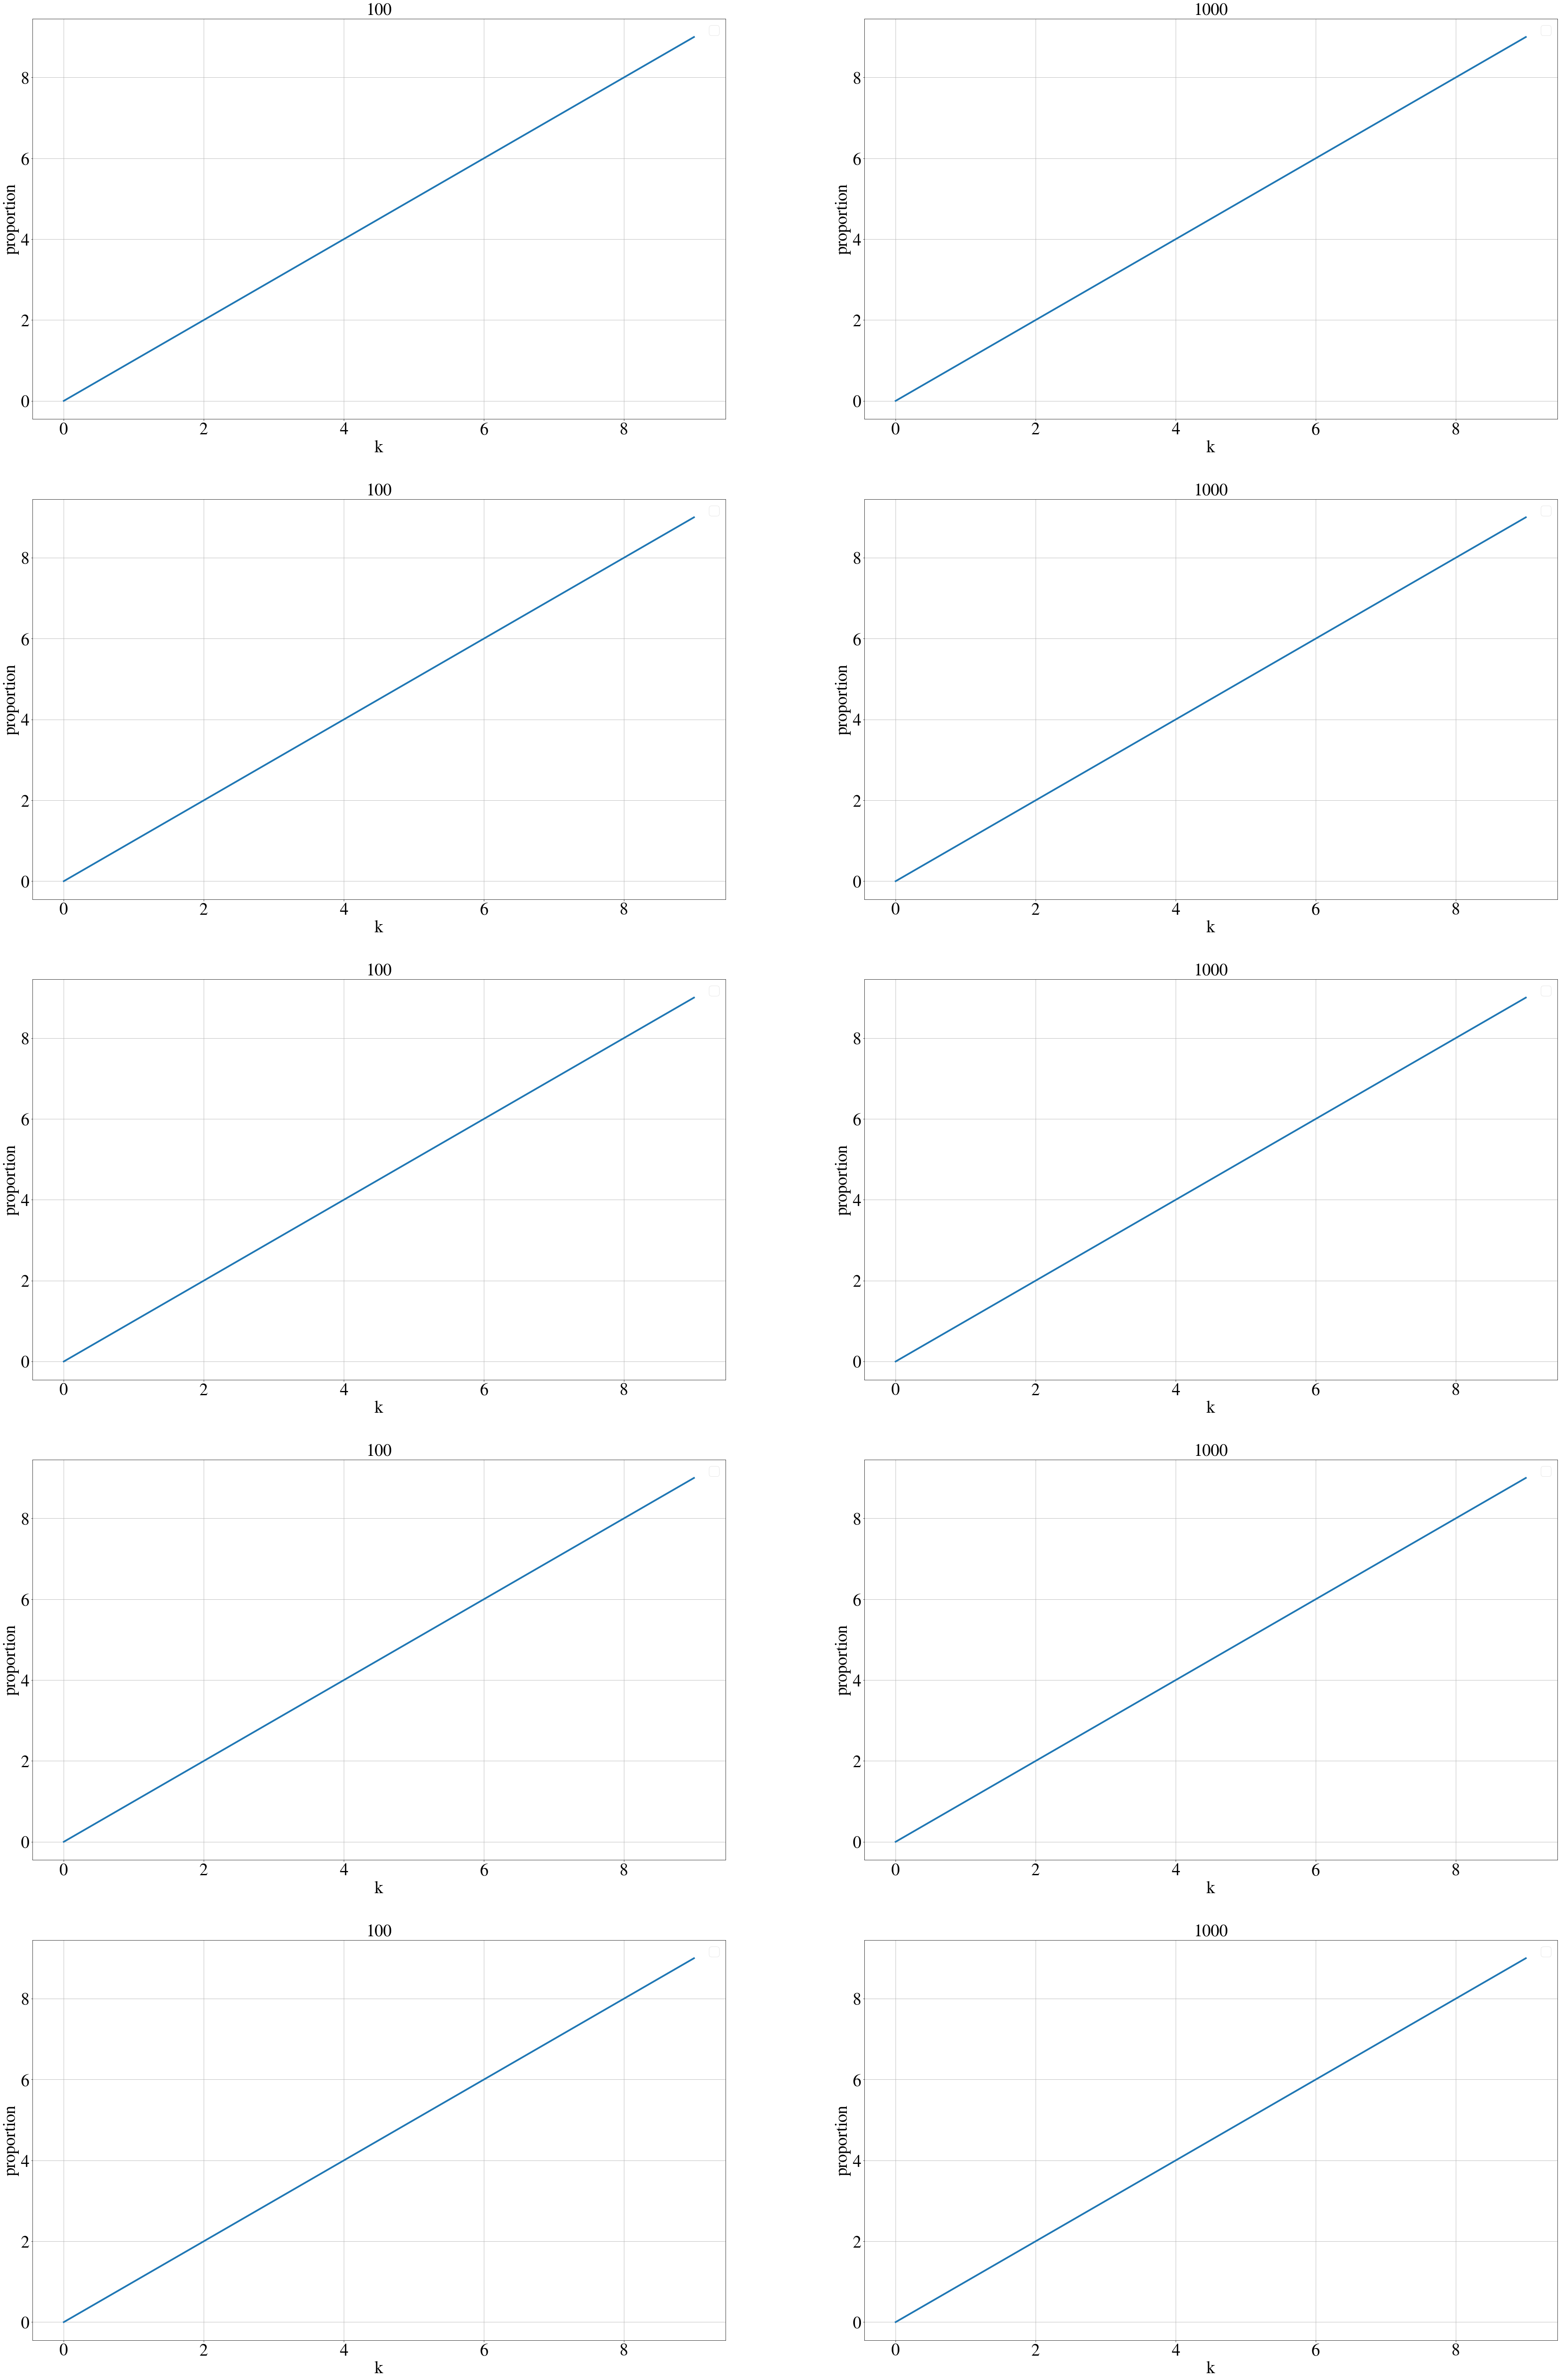

saving is finished!


In [12]:
project_path = os.getcwd() + "/"
distribution_family = "normal"
experiment_type = "synthetic"
plot_path = project_path + "plot_{0}/".format(experiment_type)

if not os.path.exists(plot_path):
    os.makedirs(plot_path)
        
d_ar = np.array([10**2, 10**3, 10**5, 10**7, 10**9], dtype=int)
d_ar = np.array([10**2, 10**3], dtype=int)

k_ar_frac =  np.array([0.01,0.1,0.2,0.5,0.9])
plots_titles = list(map (myrepr, d_ar))
filename="test"
#filename = "{0}_{1}_{2}_{3}.pdf".format(main_title, x_axis, "-".join(exps),"-".join(list(map(myrepr, ef21_page["prb"]))))
x_label, y_label = "k", "proportion"

fig, axs = plt.subplots(k_ar_frac.shape[0], d_ar.shape[0])
fig_ax_ar = (fig, axs)
#axs[dataset_num].plot(its, norms, label=all_labels_ar[i], color=color_ar_1[i], ls = line_style_ar[0],marker = marker_ar[i], ms = 30, markevery=markevery, markerfacecolor=color_ar_1[i], markeredgecolor = 'black')
for i,k in enumerate(k_ar_frac):
    for j,d in enumerate(d_ar):
        #print ("lol")
        axs[i,j].plot(np.arange(10), np.arange(10))
        
draw_axis_and_safe(fig_ax_ar, d_ar, k_ar_frac, plot_path, filename, x_label, y_label, plots_titles)

In [3]:
?np.linspace

Signature:
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is False.
num : int, optional
    Number of samples to generate. Default is 50. Must be non-negative.
endpoint : bool, optional
    If True, `stop` is the last sample. Otherwise, it is not included.
    Default is True.
retstep : 

In [4]:
num_plot_points = 10
d_ar = np.array([10**2, 10**3, 10**5, 10**7], dtype=int)
for d in d_ar:
    print( np.linspace (max(int(0.01*d),1), d, num_plot_points, dtype=int, endpoint=False))

[ 1 10 20 30 40 50 60 70 80 90]
[ 10 109 208 307 406 505 604 703 802 901]
[ 1000 10900 20800 30700 40600 50500 60400 70300 80200 90100]
[ 100000 1090000 2080000 3070000 4060000 5050000 6040000 7030000 8020000
 9010000]
